# Info
Name:  

    ORACLES_routine_4STAR

Purpose:  

    Compare the routine flights Cloud properties from 4STAR as compared to climatology
  
Input:

    none

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - matplotlib
    - scipy

  
Needed Files:

  - ...
    
History:

    Written: Samuel LeBlanc,Santa Cruz, CA, 2016-12-01

# Prepare the python environment


In [1]:
import numpy as np
import scipy.io as sio
import os
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth

In [4]:
import hdf5storage as hs

In [5]:
fp = 'C:\\Users\\sleblan2\\Research\\ORACLES\\'

# Load files


## Load the archived zenith cloud retrieval

In [6]:
days = ['20160827','20160830','20160831','20160902','20160904','20160906','20160908',
       '20160910','20160912','20160914','20160918','20160920','20160924','20160925','20160927']

In [7]:
vv = 'R0'

In [8]:
out = []
out_head = []
for d in days:
    fname = fp+'zen_ict\\v3\\4STAR-CLD_P3_{}_{vv}.ict'.format(d,vv=vv)
    tt,th = load_ict(fname,return_header=True)
    out.append(tt)
    out_head.append(th)

('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')
('Start_UTC', 'LAT', 'LON', 'COD', 'REF')


In [21]:
nm = out[0].dtype.names

In [22]:
s = {}
s['days'] = np.array([])
for n in nm:
    s[n] = np.array([])
    
for i,d in enumerate(days):
    s['days'] = np.append(s['days'],np.zeros_like(out[i]['Start_UTC'])+i)
    for n in nm:
        s[n] = np.append(s[n],out[i][n])

In [23]:
s['LAT'].shape

(191594L,)

## MODIS climatology

In [9]:
m = sio.netcdf_file(fp+'data_other\\climatology\\mombl_oracles_routine_flight_NW-SE.nc')

In [10]:
m.variables

{'AODFM_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18851be0>,
 'AOD_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18851ba8>,
 'CFTOTAL_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18851cf8>,
 'CFWATER_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18851d68>,
 'LONGITUDE': <scipy.io.netcdf.netcdf_variable at 0x18609eb8>,
 'LWP_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18851c88>,
 'NAME': <scipy.io.netcdf.netcdf_variable at 0x18851c50>,
 'ND_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18851b00>,
 'RE_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18851ac8>,
 'TTOP_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18851b38>}

In [11]:
m2 = sio.netcdf_file(fp+'data_other\\climatology\\mombl_oracles_routine_flight_NW-SE_all.nc')


In [12]:
m2.variables

{'AODFM_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18851828>,
 'AODFM_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x18867208>,
 'AOD_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18851860>,
 'AOD_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x188671d0>,
 'CFTOTAL_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18867128>,
 'CFTOTAL_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x18867320>,
 'CFWATER_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18867198>,
 'CFWATER_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x18867358>,
 'LONGITUDE': <scipy.io.netcdf.netcdf_variable at 0x1885cb00>,
 'LWP_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x188670b8>,
 'LWP_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x188672e8>,
 'NAME': <scipy.io.netcdf.netcdf_variable at 0x188517b8>,
 'ND_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18867048>,
 'ND_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x18867278>,
 'RE_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18851518>,
 'RE_YRME

# Subset for routine flight


In [13]:
d_rtn = ['20160831','20160904','20160908','20160910','20160912','20160925']

In [14]:
d_irtn = [2.0,4.0,6.0,7.0,8.0,13.0]

In [16]:
len(out)

15

In [25]:
ff = []
for d in d_irtn:
    ff.append(s['days']==d)

In [26]:
for i,f in enumerate(ff):
    if i==0:
        fl = f[0]
    else:
        fl = fl | f

In [27]:
s['fl_rtn'] = fl

# Now plot the resulting cloud properties

## Prepare with special functions

In [29]:
def color_box(bp, color):
    'Coloring of the box plot'
    # Define the elements to color. You can also add medians, fliers and means
    elements = ['boxes','caps','whiskers','medians','means','fliers']

    # Iterate over each of the elements changing the color
    for elem in elements:
        [plt.setp(bp[elem][idx], color=color) for idx in xrange(len(bp[elem]))]
    return

In [32]:
def subset_bins(vals,val_lim,lims):
    'create the subsetted bins of values'
    bins = []
    for i,c in enumerate(lims[0:-1]):
        val_fl = (val_lim>=c)&(val_lim<lims[i+1])
        bins.append(vals[val_fl])
    return bins

In [113]:
def make_boxplot(vals,val_lim,lims,pos,color='green',label=None,y=0,alpha=1.0, ax=None):
    'Compile the functions to make a box plot'

    if not ax:
        ax = plt.gca()
        
    ti = ax.get_xticks()
    tl = ax.get_xticklabels()
    
    bins = subset_bins(vals,val_lim,lims)
    
    bo = ax.boxplot(bins,y,'.',showmeans=True,positions=pos)
    color_box(bo,color)
    for n in bo.keys():
        nul = [plt.setp(bo[n][idx],alpha=alpha)for idx in xrange(len(bo[n]))]
    u = [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    v = [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    mean = [a.get_ydata()[0] for a in bo['means']]
    ax.plot(pos, mean,'s-',zorder=100,color=color,label=label,lw=2.5,alpha=alpha)
    
    #plt.gca().xaxis.set_major_locator(AutoLocator())
    #plt.gca().xaxis.set_major_locator(AutoLocator)
    ti1 = ax.set_xticks(ti)
    tl1 = ax.set_xticklabels([t for t in ti])
    
    return mean

In [94]:
def prelim():
    plt.text(0.5, 0.5, 'Preliminary',
        verticalalignment='bottom', horizontalalignment='center',
        transform=plt.gca().transAxes,
        color='k', fontsize=18,zorder=1,alpha=0.3)

## Make the plots

<IPython.core.display.Javascript object>


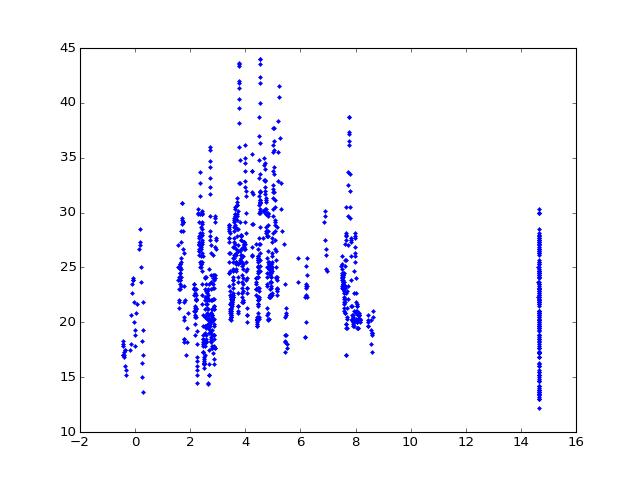

In [28]:
plt.figure()
plt.plot(s['LON'][fl],s['COD'][fl],'b.')

In [33]:
pos3 = m.variables['LONGITUDE'].data[0,:]

In [34]:
lims3 = pos3-0.5
lims3= np.append(lims3,pos3[-1]+0.5)

In [35]:
bins_cod = subset_bins(s['COD'][fl],s['LON'][fl],lims3)
bins_ref = subset_bins(s['REF'][fl],s['LON'][fl],lims3)

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in greater_equal
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


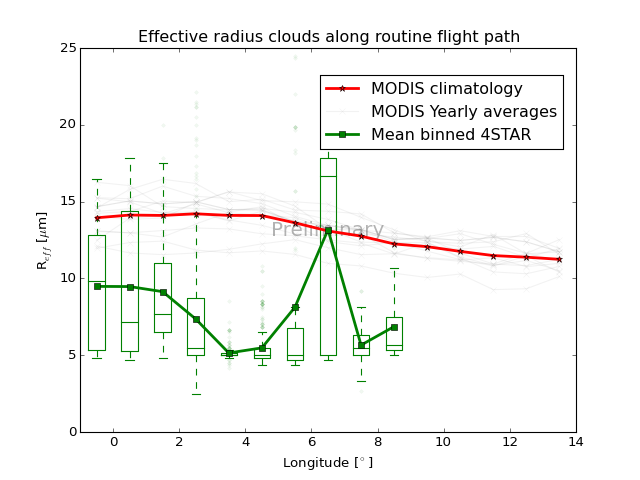

In [51]:
plt.figure()

plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['RE_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['RE_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['RE_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)

bo = plt.boxplot(bins_ref,0,'.',showmeans=True,positions=pos3)
color_box(bo,'green')
u = [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
v = [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR',lw=2.5)


plt.ylabel('R$_{{eff}}$ [$\\mu$m]')
plt.ylim(0,25)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('Effective radius clouds along routine flight path')


plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(0.99,0.95))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()

plt.savefig(fp+'plot\\MODIS_Climatology_vs_4STAR_cld_ref.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


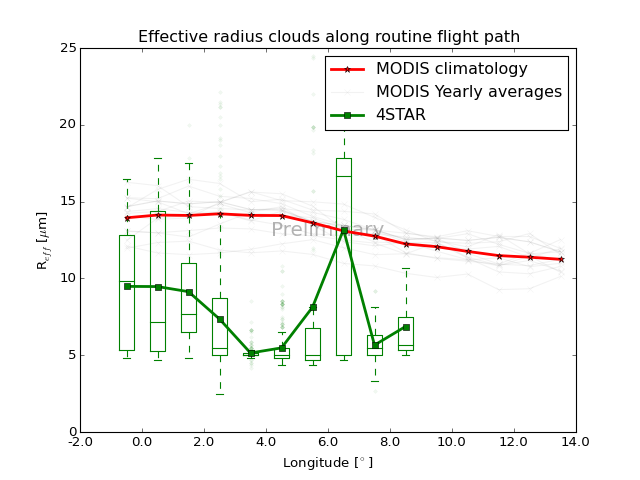

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in greater_equal
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in less


In [98]:
plt.figure()

plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['RE_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['RE_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['RE_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)

m = make_boxplot(s['REF'][fl],s['LON'][fl],lims3,pos3,color='green',label='4STAR')

plt.ylabel('R$_{{eff}}$ [$\\mu$m]')
plt.ylim(0,25)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('Effective radius clouds along routine flight path')

prelim()
plt.legend(numpoints=1)

plt.savefig(fp+'plot\\MODIS_Climatology_vs_4STAR_cld_ref.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


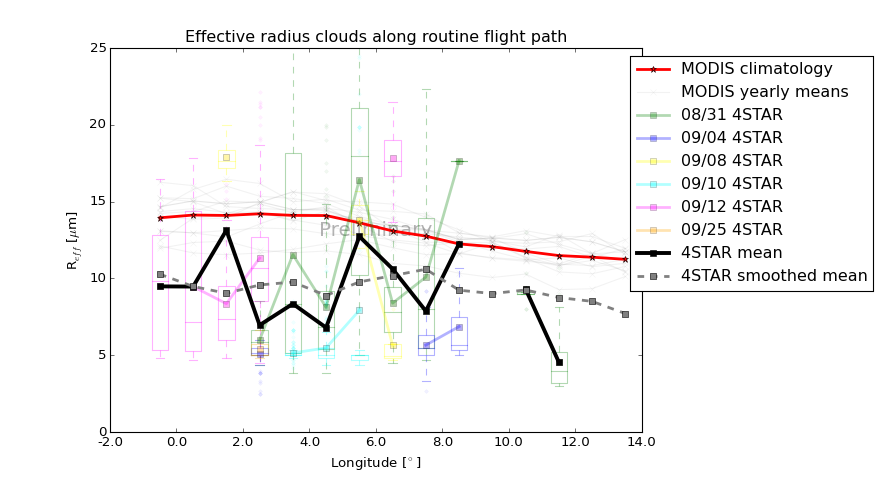

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in greater_equal
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in less


In [122]:
plt.figure(figsize=(11,6))
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['RE_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['RE_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS yearly means')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['RE_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)

means = []
cls = ['green','blue','yellow','cyan','magenta','orange']

for j,d in enumerate(d_irtn):
    m = make_boxplot(s['REF'][s['days']==d],s['LON'][s['days']==d],lims3,pos3,color=cls[j],
                     label='{}/{} 4STAR'.format(d_rtn[j][4:6],d_rtn[j][6:8]),alpha=0.3)
    means.append(m)
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',lw=3.5,label='4STAR mean',zorder=180)
plt.plot(pos3,smooth(np.nanmean(np.array(means),axis=0),6),'s--',color='grey',lw=2.5,label='4STAR smoothed mean',zorder=200)

plt.ylabel('R$_{{eff}}$ [$\\mu$m]')
plt.ylim(0,25)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('Effective radius clouds along routine flight path')

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.78, box.height])

prelim()
plt.legend(numpoints=1,bbox_to_anchor=(1.45,1.0))

plt.savefig(fp+'plot\\MODIS_Climatology_vs_4STAR_cld_ref_days.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


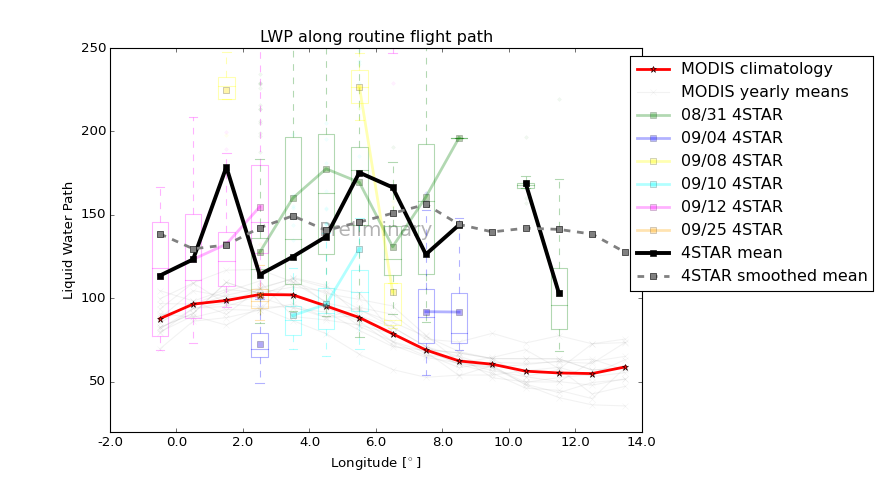

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in greater_equal
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in less


In [127]:
plt.figure(figsize=(11,6))
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['LWP_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['LWP_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS yearly means')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['LWP_YRMEAN'].data[0,:,:],
         'x-',color='grey',alpha=0.1,zorder=10)

means = []
cls = ['green','blue','yellow','cyan','magenta','orange']

for j,d in enumerate(d_irtn):
    m = make_boxplot(s['COD'][s['days']==d]*s['REF'][s['days']==d]*2.0/3.0,s['LON'][s['days']==d],lims3,pos3,color=cls[j],
                     label='{}/{} 4STAR'.format(d_rtn[j][4:6],d_rtn[j][6:8]),alpha=0.3)
    means.append(m)
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',lw=3.5,label='4STAR mean',zorder=180)
plt.plot(pos3,smooth(np.nanmean(np.array(means),axis=0),6),'s--',color='grey',lw=2.5,label='4STAR smoothed mean',zorder=200)

plt.ylabel('Liquid Water Path')
plt.ylim(20,250)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('LWP along routine flight path')

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.78, box.height])

prelim()
plt.legend(numpoints=1,bbox_to_anchor=(1.45,1.0))

plt.savefig(fp+'plot\\MODIS_Climatology_vs_4STAR_cld_LWP_days.png',transparent=True,dpi=600)